<h4>Regressão Polinomial</h4>
<p>Neste experimento será utilizada base de dados grande</p>

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
import matplotlib.pyplot as plt

<h4><b>Carregando dados</b></h4>

In [2]:
path = '/media/marcos/500GB/00_datasets/post_processing/post_processing_dataset.csv'
df = pd.read_csv(path)

In [51]:
df = df[[
    'line_category',
    'line_color',
    'station_initial_latitude',
    'station_initial_longitude',
    'station_final_latitude',
    'station_final_longitude',
    'distance',
    'average_speed_kh',
    'duration'
]]

In [52]:
df

,line_category,line_color,station_initial_latitude,station_initial_longitude,station_final_latitude,station_final_longitude,distance,average_speed_kh,duration
0,1,1,-25.406891,-49.252828,-25.433741,-49.270292,5100.000000,20.400000,900.000000
1,8,5,-25.433741,-49.270292,-25.396167,-49.358341,17300.000000,38.444444,1620.000000
2,1,1,-25.396167,-49.358341,-25.435187,-49.271813,11300.000000,24.214286,1680.000000
3,2,2,-25.435187,-49.271813,-25.436659,-49.273807,1100.000000,16.500000,240.000000
4,2,2,-25.436659,-49.273807,-25.435052,-49.275876,2000.000000,15.000000,480.000000
...,...,...,...,...,...,...,...,...,...
12367,7,6,-25.424410,-49.295560,-25.494404,-49.282068,10500.000000,25.200000,1500.000000
12368,6,5,-25.494404,-49.282068,-25.475952,-49.240087,6200.000000,26.571429,840.000000
12369,7,6,-25.475952,-49.240087,-25.459501,-49.271815,5100.000000,25.500000,720.000000
12370,3,3,-25.459501,-49.271815,-25.440706,-49.271456,2500.000000,25.000000,360.000000


<h4><b>Atribuindo valores as variáveis X e y</b></h4>

In [54]:
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

<h4><b>Divisão em treino e teste</b></h4>
<p>Utilizaremos 80% da base na etapa de treino e 20% na etapa de teste;</p>
<p>Treinaremos o algoritmo com 9897 registros e testaremos com 2475 registros.</p>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
X_train.shape, X_test.shape

((9897, 8), (2475, 8))

In [112]:
def plot_learning_curve(train_sizes, train_mean, degree):
    plt.plot(train_sizes, train_mean, label='Training MAE')
    plt.plot(train_sizes, test_mean, label='Cross-validation MAE')
    plt.title(f'Curva de Aprendizado (MAE) - RL Polinomial Grau {degree}')
    plt.xlabel('Dataset Treino')
    plt.ylabel('MAE')
    plt.legend(loc="best")
    plt.show()

<h4><b>Aplicação da regressão polinomial - Grau 2</b></h4>

Regressão Linear Polinomial - Grau 2
------------------------------------------------------------
MAE train: 29.9310
MSE train: 1983.2615
RMSE train: 44.5338
R² train: 0.9933
------------------------------------------------------------
MAE test: 29.7637
MSE test: 1971.5022
RMSE test: 44.4016
R² test: 0.9932


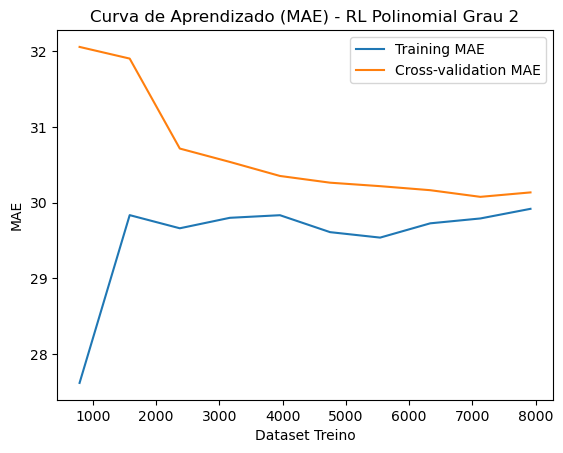

In [113]:
degree=2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor_df_poly = LinearRegression()
regressor_df_poly.fit(X_train_poly, y_train)

predicts_train = regressor_df_poly.predict(X_train_poly)
predicts_train

predicts_test = regressor_df_poly.predict(X_test_poly)
predicts_test

print(f'Regressão Linear Polinomial - Grau {degree}')

print('-'*60)

# Métricas de erros - base treino
mae_train = mean_absolute_error(y_train, predicts_train)
mse_train = mean_squared_error(y_train, predicts_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predicts_train))
r2_train = regressor_df_poly.score(X_train_poly, y_train)

print(f'MAE train: {mae_train:.4f}')
print(f'MSE train: {mse_train:.4f}')
print(f'RMSE train: {rmse_train:.4f}')
print(f'R² train: {r2_train:.4f}')

print('-'*60)

# Métricas de erros - base teste
mae_test = mean_absolute_error(y_test, predicts_test)
mse_test = mean_squared_error(y_test, predicts_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predicts_test))
r2_test = regressor_df_poly.score(X_test_poly, y_test)

print(f'MAE test: {mae_test:.4f}')
print(f'MSE test: {mse_test:.4f}')
print(f'RMSE test: {rmse_test:.4f}')
print(f'R² test: {r2_test:.4f}')

model_2 = Pipeline([
    ("polynomial_features", poly),
    ("linear_regression", regressor_df_poly)
])

train_sizes, train_scores, test_scores = learning_curve(
    model_2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plot_learning_curve(train_sizes, train_mean, degree)

<h4><b>Aplicação da regressão polinomial - Grau 3</b></h4>

Regressão Linear Polinomial - Grau 3
------------------------------------------------------------
MAE train: 14.9977
MSE train: 630.8934
RMSE train: 25.1176
R² train: 0.9979
------------------------------------------------------------
MAE test: 14.9525
MSE test: 693.5914
RMSE test: 26.3361
R² test: 0.9976


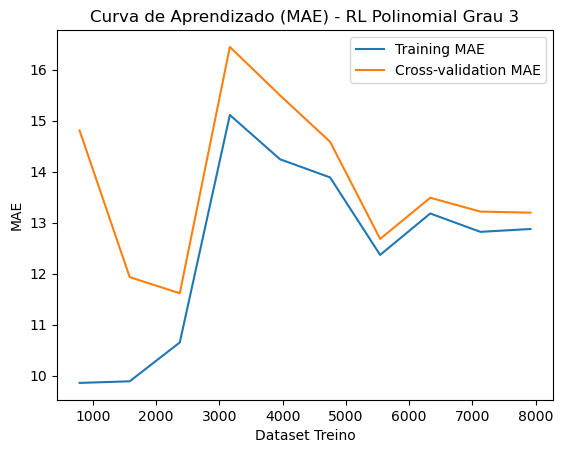

In [115]:
degree=3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor_df_poly = LinearRegression()
regressor_df_poly.fit(X_train_poly, y_train)

predicts_train = regressor_df_poly.predict(X_train_poly)
predicts_train

predicts_test = regressor_df_poly.predict(X_test_poly)
predicts_test

print(f'Regressão Linear Polinomial - Grau {degree}')

print('-'*60)

# Métricas de erros - base treino
mae_train = mean_absolute_error(y_train, predicts_train)
mse_train = mean_squared_error(y_train, predicts_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predicts_train))
r2_train = regressor_df_poly.score(X_train_poly, y_train)

print(f'MAE train: {mae_train:.4f}')
print(f'MSE train: {mse_train:.4f}')
print(f'RMSE train: {rmse_train:.4f}')
print(f'R² train: {r2_train:.4f}')

print('-'*60)

# Métricas de erros - base teste
mae_test = mean_absolute_error(y_test, predicts_test)
mse_test = mean_squared_error(y_test, predicts_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predicts_test))
r2_test = regressor_df_poly.score(X_test_poly, y_test)

print(f'MAE test: {mae_test:.4f}')
print(f'MSE test: {mse_test:.4f}')
print(f'RMSE test: {rmse_test:.4f}')
print(f'R² test: {r2_test:.4f}')

model_3 = Pipeline([
    ("polynomial_features", poly),
    ("linear_regression", regressor_df_poly)
])

train_sizes, train_scores, test_scores = learning_curve(
    model_3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plot_learning_curve(train_sizes, train_mean, degree)

<h4><b>Aplicação da regressão polinomial - Grau 4</b></h4>

Regressão Linear Polinomial - Grau 4
------------------------------------------------------------
MAE train: 4.9307
MSE train: 51.9659
RMSE train: 7.2087
R² train: 0.9998
------------------------------------------------------------
MAE test: 4.9833
MSE test: 57.7164
RMSE test: 7.5971
R² test: 0.9998


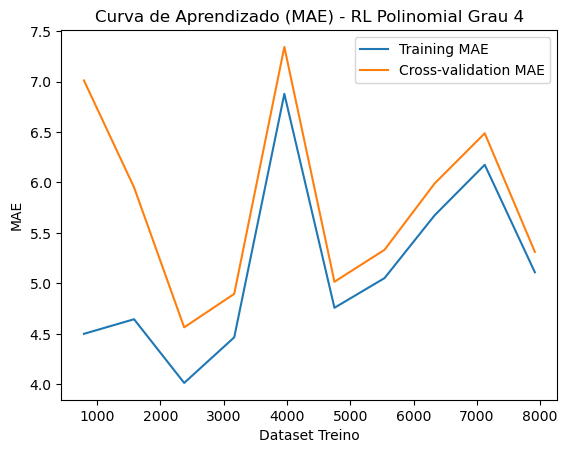

In [116]:
degree=4
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor_df_poly = LinearRegression()
regressor_df_poly.fit(X_train_poly, y_train)

predicts_train = regressor_df_poly.predict(X_train_poly)
predicts_train

predicts_test = regressor_df_poly.predict(X_test_poly)
predicts_test

print(f'Regressão Linear Polinomial - Grau {degree}')

print('-'*60)

# Métricas de erros - base treino
mae_train = mean_absolute_error(y_train, predicts_train)
mse_train = mean_squared_error(y_train, predicts_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predicts_train))
r2_train = regressor_df_poly.score(X_train_poly, y_train)

print(f'MAE train: {mae_train:.4f}')
print(f'MSE train: {mse_train:.4f}')
print(f'RMSE train: {rmse_train:.4f}')
print(f'R² train: {r2_train:.4f}')

print('-'*60)

# Métricas de erros - base teste
mae_test = mean_absolute_error(y_test, predicts_test)
mse_test = mean_squared_error(y_test, predicts_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predicts_test))
r2_test = regressor_df_poly.score(X_test_poly, y_test)

print(f'MAE test: {mae_test:.4f}')
print(f'MSE test: {mse_test:.4f}')
print(f'RMSE test: {rmse_test:.4f}')
print(f'R² test: {r2_test:.4f}')

model_4 = Pipeline([
    ("polynomial_features", poly),
    ("linear_regression", regressor_df_poly)
])

train_sizes, train_scores, test_scores = learning_curve(
    model_4, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plot_learning_curve(train_sizes, train_mean, degree)